In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [10]:
X_train_full.shape

(60000, 28, 28)

In [11]:
X_train_full.dtype

dtype('uint8')

In [12]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

 every image is represented as a 28×28 array rather than a 1D array of size 784. Moreover, the pixel intensities are represented as integers (from 0 to 255) rather than floats (from 0.0 to 255.0)

In [14]:
# scaling the input since we are using Gradient Descent
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [15]:
# understanding the class labels

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [17]:
y_train[0]

4

In [18]:
class_names[y_train[0]]

'Coat'

In [19]:
# creating a model using the sequential API
model = keras.models.Sequential()

In [20]:
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.layers

In [27]:
# Looking at the weights, and biases of the model
weights, biases = model.get_layer('dense_1').get_weights()

In [28]:
weights

array([[-0.01128004, -0.00735682,  0.09361725, ..., -0.09209834,
        -0.08681822, -0.03004577],
       [ 0.05650689, -0.00498833,  0.05840374, ..., -0.01784371,
        -0.06637096,  0.11309985],
       [-0.02546272, -0.08141825,  0.08683679, ..., -0.00883499,
        -0.0058987 , -0.06083787],
       ...,
       [ 0.00953818,  0.03811146, -0.00605261, ...,  0.0470515 ,
        -0.05743313,  0.04480235],
       [-0.09500621,  0.02215839, -0.05008762, ...,  0.03873315,
         0.00718696,  0.09941693],
       [ 0.03429104,  0.0424263 , -0.1135316 , ...,  0.11729642,
        -0.01590876,  0.03119291]], dtype=float32)

In [29]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [30]:
#you can set kernel_initializer (kernel is another name for the matrix of connec‐ tion weights) or bias_initializer when creating the layer

In [31]:
# Compiling the model
model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="sgd",
                  metrics=["accuracy"])

In [32]:
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 49us/sample - loss: 0.7224 - accuracy: 0.7591 - val_loss: 0.5125 - val_accuracy: 0.8282
Epoch 2/30
55000/55000 [==============================] - 2s 44us/sample - loss: 0.4948 - accuracy: 0.8273 - val_loss: 0.4814 - val_accuracy: 0.8312
Epoch 3/30
55000/55000 [==============================] - 2s 43us/sample - loss: 0.4480 - accuracy: 0.8432 - val_loss: 0.4308 - val_accuracy: 0.8482
Epoch 4/30
55000/55000 [==============================] - 2s 44us/sample - loss: 0.4196 - accuracy: 0.8533 - val_loss: 0.3980 - val_accuracy: 0.8656
Epoch 5/30
55000/55000 [==============================] - 2s 45us/sample - loss: 0.3999 - accuracy: 0.8596 - val_loss: 0.3863 - val_accuracy: 0.8644
Epoch 6/30
55000/55000 [==============================] - 2s 44us/sample - loss: 0.3835 - accuracy: 0.8664 - val_loss: 0.3899 - val_accuracy: 0.8616
Epoch 7/30
55000/55000 [==============================] -

In [33]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [36]:
history.history

{'loss': [0.7223682985956018,
  0.4947564394604076,
  0.44802508129856805,
  0.4196484719016335,
  0.39993995835130863,
  0.3835165087526495,
  0.3697991550055417,
  0.3577111726630818,
  0.3473910493590615,
  0.33842482429200954,
  0.32880902249596333,
  0.3205253321951086,
  0.3122899998426437,
  0.306469693498178,
  0.29909581359083004,
  0.2931331576889212,
  0.28775002394806254,
  0.28205479870709504,
  0.27640809055458415,
  0.2723044556942853,
  0.2667009500850331,
  0.2614359555883841,
  0.2579382946469567,
  0.2528232771645893,
  0.2490648357413032,
  0.24371447787772527,
  0.24048340202895077,
  0.2360901727123694,
  0.23215109536431053,
  0.22829796201315794],
 'accuracy': [0.7591091,
  0.82732725,
  0.8432182,
  0.85327274,
  0.85963637,
  0.86643636,
  0.8692182,
  0.87307274,
  0.8778727,
  0.8797455,
  0.88356364,
  0.8852364,
  0.8880182,
  0.8903818,
  0.89214545,
  0.8949091,
  0.8965091,
  0.8998727,
  0.90043634,
  0.9025091,
  0.9026909,
  0.90549093,
  0.9080727,


In [39]:
# Looking at the learning curves
import pandas as pd
import matplotlib.pyplot as plt

(0, 1)

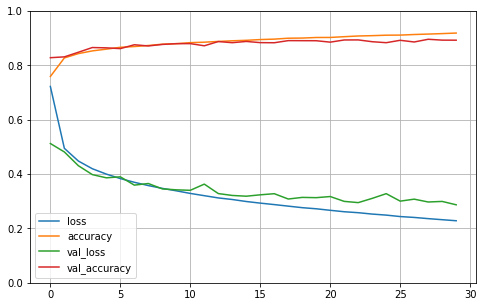

In [40]:
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] plt.show()

In [41]:
# may be a little bit of overfitting. Not much they seem close to each other

In [ ]:
# loss seems to be going down in the validation set. So, we could train further.
#It’s as simple as calling the fit() method again, since Keras just continues train‐ ing where it left off 

In [42]:
history = model.fit(X_train, y_train, epochs=5, 
                    validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 2s 44us/sample - loss: 0.2247 - accuracy: 0.9193 - val_loss: 0.3005 - val_accuracy: 0.8960
Epoch 2/5
55000/55000 [==============================] - 2s 44us/sample - loss: 0.2216 - accuracy: 0.9206 - val_loss: 0.2926 - val_accuracy: 0.8930
Epoch 3/5
55000/55000 [==============================] - 2s 42us/sample - loss: 0.2171 - accuracy: 0.9221 - val_loss: 0.2993 - val_accuracy: 0.8876
Epoch 4/5
55000/55000 [==============================] - 2s 43us/sample - loss: 0.2138 - accuracy: 0.9243 - val_loss: 0.2938 - val_accuracy: 0.8976
Epoch 5/5
55000/55000 [==============================] - 2s 43us/sample - loss: 0.2100 - accuracy: 0.9244 - val_loss: 0.2995 - val_accuracy: 0.8974


In [43]:
# Evaluating the test set
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 31us/sample - loss: 70.7952 - accuracy: 0.8477


[70.79522146884202, 0.8477]

In [44]:
#Fine tuning the model for network hyperparameters

In [53]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]): 
    model = keras.models.Sequential()
    options = {"input_shape": input_shape}
    model.add(keras.layers.Flatten(input_shape=[28,28]))
    
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
  
    
    model.add(keras.layers.Dense(10, activation="softmax"))
    optimizer = keras.optimizers.SGD(learning_rate) 
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,metrics=["accuracy"]) 
        
    return model

In [54]:
keras_classifier = keras.wrappers.scikit_learn.KerasClassifier(build_model)

In [ ]:
# Use Random search CV to find the best parameters.

In [55]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [ ]:
 param_distribs = {
        "n_hidden": [0, 1, 2, 3],
        "n_neurons": np.arange(1, 100),
        "learning_rate": reciprocal(3e-4, 3e-2)}
    
rnd_search_cv = RandomizedSearchCV(keras_classifier, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 36666 samples, validate on 5000 samples
Epoch 1/100
36666/36666 [==============================] - 2s 42us/sample - loss: 1.2052 - accuracy: 0.6048 - val_loss: 0.7269 - val_accuracy: 0.7526
Epoch 2/100
36666/36666 [==============================] - 1s 37us/sample - loss: 0.6529 - accuracy: 0.7723 - val_loss: 0.5751 - val_accuracy: 0.8024
Epoch 3/100
36666/36666 [==============================] - 1s 36us/sample - loss: 0.5594 - accuracy: 0.8063 - val_loss: 0.5189 - val_accuracy: 0.8266
Epoch 4/100
36666/36666 [==============================] - 1s 37us/sample - loss: 0.5145 - accuracy: 0.8188 - val_loss: 0.4855 - val_accuracy: 0.8296
Epoch 5/100
36666/36666 [==============================] - 1s 36us/sample - loss: 0.4870 - accuracy: 0.8286 - val_loss: 0.4634 - val_accuracy: 0.8410
Epoch 6/100
36666/36666 [==============================] - 1s 37us/sample - loss: 0.4685 - accuracy: 0.8358 - val_loss: 0.4478 - val_accuracy: 0.8486
Epoch 7/100
36666/36666 [==========================

36667/36667 [==============================] - 1s 36us/sample - loss: 0.2444 - accuracy: 0.9102 - val_loss: 0.3298 - val_accuracy: 0.8840
Epoch 66/100
36667/36667 [==============================] - 1s 36us/sample - loss: 0.2428 - accuracy: 0.9109 - val_loss: 0.3370 - val_accuracy: 0.8802
Epoch 67/100
36667/36667 [==============================] - 1s 35us/sample - loss: 0.2404 - accuracy: 0.9113 - val_loss: 0.3333 - val_accuracy: 0.8790
Epoch 68/100
36667/36667 [==============================] - 1s 36us/sample - loss: 0.2390 - accuracy: 0.9126 - val_loss: 0.3324 - val_accuracy: 0.8826
Epoch 69/100
36667/36667 [==============================] - 1s 35us/sample - loss: 0.2372 - accuracy: 0.9117 - val_loss: 0.3276 - val_accuracy: 0.8820
Epoch 70/100
18333/18333 [==============================] - 0s 23us/sample - loss: 0.3428 - accuracy: 0.8831
Train on 36667 samples, validate on 5000 samples
Epoch 1/100
36667/36667 [==============================] - 2s 41us/sample - loss: 1.2814 - accuracy:

Epoch 36/100
36666/36666 [==============================] - 1s 29us/sample - loss: 0.4367 - accuracy: 0.8533 - val_loss: 0.4432 - val_accuracy: 0.8552
Epoch 37/100
36666/36666 [==============================] - 1s 29us/sample - loss: 0.4354 - accuracy: 0.8535 - val_loss: 0.4434 - val_accuracy: 0.8550
Epoch 38/100
36666/36666 [==============================] - 1s 28us/sample - loss: 0.4340 - accuracy: 0.8537 - val_loss: 0.4424 - val_accuracy: 0.8554
Epoch 39/100
36666/36666 [==============================] - 1s 28us/sample - loss: 0.4329 - accuracy: 0.8543 - val_loss: 0.4408 - val_accuracy: 0.8548
Epoch 40/100
36666/36666 [==============================] - 1s 28us/sample - loss: 0.4318 - accuracy: 0.8549 - val_loss: 0.4409 - val_accuracy: 0.8538
Epoch 41/100
36666/36666 [==============================] - 1s 28us/sample - loss: 0.4308 - accuracy: 0.8552 - val_loss: 0.4393 - val_accuracy: 0.8550
Epoch 42/100
36666/36666 [==============================] - 1s 29us/sample - loss: 0.4299 - ac

36667/36667 [==============================] - 1s 28us/sample - loss: 0.4318 - accuracy: 0.8525 - val_loss: 0.4381 - val_accuracy: 0.8532
Epoch 44/100
36667/36667 [==============================] - 1s 28us/sample - loss: 0.4306 - accuracy: 0.8527 - val_loss: 0.4377 - val_accuracy: 0.8528
Epoch 45/100
36667/36667 [==============================] - 1s 28us/sample - loss: 0.4296 - accuracy: 0.8524 - val_loss: 0.4372 - val_accuracy: 0.8534
Epoch 46/100
36667/36667 [==============================] - 1s 29us/sample - loss: 0.4287 - accuracy: 0.8528 - val_loss: 0.4362 - val_accuracy: 0.8530
Epoch 47/100
36667/36667 [==============================] - 1s 28us/sample - loss: 0.4276 - accuracy: 0.8539 - val_loss: 0.4354 - val_accuracy: 0.8542
Epoch 48/100
36667/36667 [==============================] - 1s 28us/sample - loss: 0.4269 - accuracy: 0.8538 - val_loss: 0.4355 - val_accuracy: 0.8540
Epoch 49/100
36667/36667 [==============================] - 1s 28us/sample - loss: 0.4260 - accuracy: 0.854

36667/36667 [==============================] - 1s 29us/sample - loss: 0.4244 - accuracy: 0.8551 - val_loss: 0.4367 - val_accuracy: 0.8534
Epoch 51/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.4237 - accuracy: 0.8552 - val_loss: 0.4339 - val_accuracy: 0.8552
Epoch 52/100
36667/36667 [==============================] - 1s 29us/sample - loss: 0.4229 - accuracy: 0.8553 - val_loss: 0.4332 - val_accuracy: 0.8576
Epoch 53/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.4220 - accuracy: 0.8561 - val_loss: 0.4334 - val_accuracy: 0.8568
Epoch 54/100
36667/36667 [==============================] - 1s 28us/sample - loss: 0.4211 - accuracy: 0.8559 - val_loss: 0.4331 - val_accuracy: 0.8570
Epoch 55/100
36667/36667 [==============================] - 1s 29us/sample - loss: 0.4206 - accuracy: 0.8563 - val_loss: 0.4324 - val_accuracy: 0.8566
Epoch 56/100
36667/36667 [==============================] - 1s 29us/sample - loss: 0.4199 - accuracy: 0.856

36666/36666 [==============================] - 1s 34us/sample - loss: 0.3824 - accuracy: 0.8683 - val_loss: 0.3981 - val_accuracy: 0.8650
Epoch 56/100
36666/36666 [==============================] - 1s 35us/sample - loss: 0.3808 - accuracy: 0.8688 - val_loss: 0.3997 - val_accuracy: 0.8656
Epoch 57/100
36666/36666 [==============================] - 1s 34us/sample - loss: 0.3799 - accuracy: 0.8676 - val_loss: 0.4022 - val_accuracy: 0.8660
Epoch 58/100
36666/36666 [==============================] - 1s 33us/sample - loss: 0.3787 - accuracy: 0.8699 - val_loss: 0.3980 - val_accuracy: 0.8666
Epoch 59/100
36666/36666 [==============================] - 1s 33us/sample - loss: 0.3773 - accuracy: 0.8713 - val_loss: 0.3952 - val_accuracy: 0.8662
Epoch 60/100
36666/36666 [==============================] - 1s 33us/sample - loss: 0.3759 - accuracy: 0.8702 - val_loss: 0.3943 - val_accuracy: 0.8660
Epoch 61/100
36666/36666 [==============================] - 1s 33us/sample - loss: 0.3750 - accuracy: 0.870

36667/36667 [==============================] - 1s 34us/sample - loss: 0.3892 - accuracy: 0.8629 - val_loss: 0.4041 - val_accuracy: 0.8574: 0.3901 - accu - ETA: 0s - loss: 0.3918 - accuracy: 
Epoch 59/100
36667/36667 [==============================] - 1s 33us/sample - loss: 0.3879 - accuracy: 0.8646 - val_loss: 0.4038 - val_accuracy: 0.8634
Epoch 60/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.3869 - accuracy: 0.8642 - val_loss: 0.3986 - val_accuracy: 0.8618ura
Epoch 61/100
36667/36667 [==============================] - 1s 33us/sample - loss: 0.3855 - accuracy: 0.8650 - val_loss: 0.4015 - val_accuracy: 0.8624
Epoch 62/100
36667/36667 [==============================] - 1s 33us/sample - loss: 0.3847 - accuracy: 0.8649 - val_loss: 0.3984 - val_accuracy: 0.8630
Epoch 63/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.3837 - accuracy: 0.8648 - val_loss: 0.3973 - val_accuracy: 0.8624
Epoch 64/100
36667/36667 [=========================

Epoch 62/100
36667/36667 [==============================] - 1s 33us/sample - loss: 0.3764 - accuracy: 0.8693 - val_loss: 0.4042 - val_accuracy: 0.8648
Epoch 63/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.3755 - accuracy: 0.8704 - val_loss: 0.3939 - val_accuracy: 0.8682
Epoch 64/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.3741 - accuracy: 0.8710 - val_loss: 0.3959 - val_accuracy: 0.8668
Epoch 65/100
36667/36667 [==============================] - 3966s 108ms/sample - loss: 0.3729 - accuracy: 0.8715 - val_loss: 0.3967 - val_accuracy: 0.8686
Epoch 66/100
36667/36667 [==============================] - 1s 37us/sample - loss: 0.3722 - accuracy: 0.8714 - val_loss: 0.3951 - val_accuracy: 0.8678
Epoch 67/100
36667/36667 [==============================] - 2s 44us/sample - loss: 0.3711 - accuracy: 0.8713 - val_loss: 0.3922 - val_accuracy: 0.8678
Epoch 68/100
36667/36667 [==============================] - 1s 40us/sample - loss: 0.3701 

36666/36666 [==============================] - 1s 32us/sample - loss: 0.4174 - accuracy: 0.8559 - val_loss: 0.4324 - val_accuracy: 0.8544
Epoch 69/100
36666/36666 [==============================] - 1s 31us/sample - loss: 0.4164 - accuracy: 0.8569 - val_loss: 0.4284 - val_accuracy: 0.8570
Epoch 70/100
36666/36666 [==============================] - 1s 31us/sample - loss: 0.4152 - accuracy: 0.8577 - val_loss: 0.4288 - val_accuracy: 0.8534
Epoch 71/100
36666/36666 [==============================] - 1s 30us/sample - loss: 0.4144 - accuracy: 0.8578 - val_loss: 0.4271 - val_accuracy: 0.8544
Epoch 72/100
36666/36666 [==============================] - 1s 33us/sample - loss: 0.4128 - accuracy: 0.8577 - val_loss: 0.4266 - val_accuracy: 0.8548
Epoch 73/100
36666/36666 [==============================] - 1s 36us/sample - loss: 0.4122 - accuracy: 0.8586 - val_loss: 0.4261 - val_accuracy: 0.8554
Epoch 74/100
36666/36666 [==============================] - 1s 35us/sample - loss: 0.4109 - accuracy: 0.858

Epoch 75/100
36667/36667 [==============================] - 1s 31us/sample - loss: 0.4100 - accuracy: 0.8552 - val_loss: 0.4182 - val_accuracy: 0.8602
Epoch 76/100
36667/36667 [==============================] - 1s 33us/sample - loss: 0.4090 - accuracy: 0.8553 - val_loss: 0.4171 - val_accuracy: 0.8618
Epoch 77/100
36667/36667 [==============================] - 1s 32us/sample - loss: 0.4084 - accuracy: 0.8553 - val_loss: 0.4152 - val_accuracy: 0.8616
Epoch 78/100
36667/36667 [==============================] - 1s 35us/sample - loss: 0.4076 - accuracy: 0.8552 - val_loss: 0.4171 - val_accuracy: 0.8628
Epoch 79/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.4061 - accuracy: 0.8570 - val_loss: 0.4175 - val_accuracy: 0.8610
Epoch 80/100
36667/36667 [==============================] - 1s 36us/sample - loss: 0.4060 - accuracy: 0.8557 - val_loss: 0.4127 - val_accuracy: 0.8638
Epoch 81/100
36667/36667 [==============================] - 1s 33us/sample - loss: 0.4046 - ac

Epoch 28/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.4945 - accuracy: 0.8277 - val_loss: 0.4843 - val_accuracy: 0.8358
Epoch 29/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.4905 - accuracy: 0.8290 - val_loss: 0.4821 - val_accuracy: 0.8364
Epoch 30/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.4874 - accuracy: 0.8303 - val_loss: 0.4779 - val_accuracy: 0.8374
Epoch 31/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.4844 - accuracy: 0.8312 - val_loss: 0.4756 - val_accuracy: 0.8368
Epoch 32/100
36667/36667 [==============================] - 1s 31us/sample - loss: 0.4814 - accuracy: 0.8327 - val_loss: 0.4705 - val_accuracy: 0.8380
Epoch 33/100
36667/36667 [==============================] - 1s 33us/sample - loss: 0.4783 - accuracy: 0.8336 - val_loss: 0.4730 - val_accuracy: 0.8384
Epoch 34/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.4751 - ac

36666/36666 [==============================] - 1s 27us/sample - loss: 0.4998 - accuracy: 0.8345 - val_loss: 0.5005 - val_accuracy: 0.8414
Epoch 36/100
36666/36666 [==============================] - ETA: 0s - loss: 0.4976 - accuracy: 0.83 - 1s 27us/sample - loss: 0.4980 - accuracy: 0.8347 - val_loss: 0.4956 - val_accuracy: 0.8414
Epoch 37/100
36666/36666 [==============================] - 1s 27us/sample - loss: 0.4960 - accuracy: 0.8346 - val_loss: 0.4931 - val_accuracy: 0.8418
Epoch 38/100
36666/36666 [==============================] - 1s 27us/sample - loss: 0.4942 - accuracy: 0.8357 - val_loss: 0.4923 - val_accuracy: 0.8418 - accuracy
Epoch 39/100
36666/36666 [==============================] - 1s 27us/sample - loss: 0.4924 - accuracy: 0.8364 - val_loss: 0.4910 - val_accuracy: 0.8434
Epoch 40/100
36666/36666 [==============================] - 1s 27us/sample - loss: 0.4907 - accuracy: 0.8375 - val_loss: 0.4883 - val_accuracy: 0.8434
Epoch 41/100
36666/36666 [============================

36667/36667 [==============================] - 1s 33us/sample - loss: 0.4914 - accuracy: 0.8350 - val_loss: 0.4894 - val_accuracy: 0.8410
Epoch 42/100
36667/36667 [==============================] - 1s 33us/sample - loss: 0.4899 - accuracy: 0.8351 - val_loss: 0.4882 - val_accuracy: 0.8390- loss: 0.4839 - accuracy: 0.83 - ETA: 0s - loss: 0.483
Epoch 43/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.4883 - accuracy: 0.8356 - val_loss: 0.4868 - val_accuracy: 0.8428
Epoch 44/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.4866 - accuracy: 0.8363 - val_loss: 0.4859 - val_accuracy: 0.8412
Epoch 45/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.4853 - accuracy: 0.8366 - val_loss: 0.4846 - val_accuracy: 0.8414
Epoch 46/100
36667/36667 [==============================] - 1s 32us/sample - loss: 0.4840 - accuracy: 0.8363 - val_loss: 0.4833 - val_accuracy: 0.8424
Epoch 47/100
36667/36667 [==========================

36667/36667 [==============================] - 1s 30us/sample - loss: 0.4819 - accuracy: 0.8390 - val_loss: 0.4816 - val_accuracy: 0.8432
Epoch 48/100
36667/36667 [==============================] - 1s 31us/sample - loss: 0.4806 - accuracy: 0.8398 - val_loss: 0.4805 - val_accuracy: 0.8422 accura
Epoch 49/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.4793 - accuracy: 0.8400 - val_loss: 0.4785 - val_accuracy: 0.8450
Epoch 50/100
36667/36667 [==============================] - 1s 29us/sample - loss: 0.4781 - accuracy: 0.8396 - val_loss: 0.4773 - val_accuracy: 0.8446
Epoch 51/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.4770 - accuracy: 0.8402 - val_loss: 0.4766 - val_accuracy: 0.8442
Epoch 52/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.4757 - accuracy: 0.8413 - val_loss: 0.4751 - val_accuracy: 0.8454
Epoch 53/100
36667/36667 [==============================] - 1s 29us/sample - loss: 0.4745 - accuracy

Epoch 54/100
36666/36666 [==============================] - 1s 32us/sample - loss: 0.5148 - accuracy: 0.8310 - val_loss: 0.5121 - val_accuracy: 0.8332
Epoch 55/100
36666/36666 [==============================] - 1s 34us/sample - loss: 0.5135 - accuracy: 0.8309 - val_loss: 0.5114 - val_accuracy: 0.8324
Epoch 56/100
36666/36666 [==============================] - 1s 34us/sample - loss: 0.5121 - accuracy: 0.8310 - val_loss: 0.5096 - val_accuracy: 0.8350
Epoch 57/100
36666/36666 [==============================] - 1s 35us/sample - loss: 0.5108 - accuracy: 0.8323 - val_loss: 0.5091 - val_accuracy: 0.8354
Epoch 58/100
36666/36666 [==============================] - 1s 35us/sample - loss: 0.5095 - accuracy: 0.8323 - val_loss: 0.5078 - val_accuracy: 0.8342
Epoch 59/100
36666/36666 [==============================] - 1s 35us/sample - loss: 0.5083 - accuracy: 0.8322 - val_loss: 0.5061 - val_accuracy: 0.8366
Epoch 60/100
36666/36666 [==============================] - 1s 33us/sample - loss: 0.5071 - ac

36667/36667 [==============================] - 1s 29us/sample - loss: 0.5120 - accuracy: 0.8290 - val_loss: 0.5078 - val_accuracy: 0.8352ss: 0.5131 - ac
Epoch 62/100
36667/36667 [==============================] - 1s 31us/sample - loss: 0.5108 - accuracy: 0.8289 - val_loss: 0.5070 - val_accuracy: 0.8366
Epoch 63/100
36667/36667 [==============================] - 1s 31us/sample - loss: 0.5096 - accuracy: 0.8292 - val_loss: 0.5058 - val_accuracy: 0.8368
Epoch 64/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.5084 - accuracy: 0.8301 - val_loss: 0.5049 - val_accuracy: 0.8354
Epoch 65/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.5074 - accuracy: 0.8301 - val_loss: 0.5041 - val_accuracy: 0.8352
Epoch 66/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.5062 - accuracy: 0.8306 - val_loss: 0.5030 - val_accuracy: 0.8358
Epoch 67/100
36667/36667 [==============================] - 1s 29us/sample - loss: 0.5051 - 

36667/36667 [==============================] - 1s 30us/sample - loss: 0.5014 - accuracy: 0.8326 - val_loss: 0.4979 - val_accuracy: 0.8386
Epoch 69/100
36667/36667 [==============================] - 1s 29us/sample - loss: 0.5004 - accuracy: 0.8337 - val_loss: 0.4974 - val_accuracy: 0.8382
Epoch 70/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.4994 - accuracy: 0.8335 - val_loss: 0.4964 - val_accuracy: 0.8384
Epoch 71/100
36667/36667 [==============================] - 1s 29us/sample - loss: 0.4983 - accuracy: 0.8345 - val_loss: 0.4950 - val_accuracy: 0.8398
Epoch 72/100
36667/36667 [==============================] - 1s 29us/sample - loss: 0.4974 - accuracy: 0.8339 - val_loss: 0.4947 - val_accuracy: 0.8394
Epoch 73/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.4963 - accuracy: 0.8346 - val_loss: 0.4937 - val_accuracy: 0.8402
Epoch 74/100
36667/36667 [==============================] - 1s 29us/sample - loss: 0.4953 - accuracy: 0.834

Epoch 75/100
36666/36666 [==============================] - 1s 34us/sample - loss: 0.5270 - accuracy: 0.8228 - val_loss: 0.5228 - val_accuracy: 0.8262
Epoch 76/100
36666/36666 [==============================] - 1s 32us/sample - loss: 0.5254 - accuracy: 0.8235 - val_loss: 0.5204 - val_accuracy: 0.8282
Epoch 77/100
36666/36666 [==============================] - 1s 36us/sample - loss: 0.5241 - accuracy: 0.8243 - val_loss: 0.5192 - val_accuracy: 0.8288
Epoch 78/100
36666/36666 [==============================] - 1s 35us/sample - loss: 0.5227 - accuracy: 0.8245 - val_loss: 0.5179 - val_accuracy: 0.8290
Epoch 79/100
36666/36666 [==============================] - 1s 34us/sample - loss: 0.5213 - accuracy: 0.8254 - val_loss: 0.5165 - val_accuracy: 0.8290
Epoch 80/100
36666/36666 [==============================] - 1s 34us/sample - loss: 0.5199 - accuracy: 0.8244 - val_loss: 0.5152 - val_accuracy: 0.8300
Epoch 81/100
36666/36666 [==============================] - 1s 34us/sample - loss: 0.5186 - ac

36667/36667 [==============================] - 1s 35us/sample - loss: 0.5327 - accuracy: 0.8149 - val_loss: 0.5229 - val_accuracy: 0.8252
Epoch 83/100
36667/36667 [==============================] - 1s 35us/sample - loss: 0.5313 - accuracy: 0.8152 - val_loss: 0.5217 - val_accuracy: 0.8260
Epoch 84/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.5299 - accuracy: 0.8160 - val_loss: 0.5202 - val_accuracy: 0.8260
Epoch 85/100
36667/36667 [==============================] - 1s 36us/sample - loss: 0.5285 - accuracy: 0.8160 - val_loss: 0.5192 - val_accuracy: 0.8270
Epoch 86/100
36667/36667 [==============================] - 1s 32us/sample - loss: 0.5271 - accuracy: 0.8167 - val_loss: 0.5180 - val_accuracy: 0.8272
Epoch 87/100
36667/36667 [==============================] - 1s 33us/sample - loss: 0.5258 - accuracy: 0.8173 - val_loss: 0.5160 - val_accuracy: 0.8272
Epoch 88/100
36667/36667 [==============================] - 1s 32us/sample - loss: 0.5245 - accuracy: 0.817

36667/36667 [==============================] - 1s 40us/sample - loss: 0.6380 - accuracy: 0.7905 - val_loss: 0.6238 - val_accuracy: 0.7980
Epoch 36/100
36667/36667 [==============================] - 1s 37us/sample - loss: 0.6330 - accuracy: 0.7919 - val_loss: 0.6202 - val_accuracy: 0.7980
Epoch 37/100
36667/36667 [==============================] - 1s 38us/sample - loss: 0.6284 - accuracy: 0.7939 - val_loss: 0.6144 - val_accuracy: 0.8004
Epoch 38/100
36667/36667 [==============================] - 1s 38us/sample - loss: 0.6241 - accuracy: 0.7944 - val_loss: 0.6102 - val_accuracy: 0.8036
Epoch 39/100
36667/36667 [==============================] - 1s 38us/sample - loss: 0.6197 - accuracy: 0.7963 - val_loss: 0.6061 - val_accuracy: 0.8034
Epoch 40/100
36667/36667 [==============================] - 1s 36us/sample - loss: 0.6157 - accuracy: 0.7968 - val_loss: 0.6022 - val_accuracy: 0.8046
Epoch 41/100
36667/36667 [==============================] - 1s 38us/sample - loss: 0.6118 - accuracy: 0.798

36666/36666 [==============================] - 2s 52us/sample - loss: 0.4224 - accuracy: 0.8525 - val_loss: 0.4352 - val_accuracy: 0.8526
Epoch 43/100
36666/36666 [==============================] - 2s 52us/sample - loss: 0.4200 - accuracy: 0.8546 - val_loss: 0.4229 - val_accuracy: 0.8554
Epoch 44/100
36666/36666 [==============================] - 2s 49us/sample - loss: 0.4177 - accuracy: 0.8549 - val_loss: 0.4238 - val_accuracy: 0.8546
Epoch 45/100
36666/36666 [==============================] - 2s 50us/sample - loss: 0.4161 - accuracy: 0.8548 - val_loss: 0.4246 - val_accuracy: 0.8558
Epoch 46/100
36666/36666 [==============================] - 2s 54us/sample - loss: 0.4141 - accuracy: 0.8553 - val_loss: 0.4235 - val_accuracy: 0.8558
Epoch 47/100
36666/36666 [==============================] - 2s 54us/sample - loss: 0.4121 - accuracy: 0.8558 - val_loss: 0.4149 - val_accuracy: 0.8572
Epoch 48/100
36666/36666 [==============================] - 2s 53us/sample - loss: 0.4104 - accuracy: 0.856

36667/36667 [==============================] - 2s 46us/sample - loss: 0.4096 - accuracy: 0.8558 - val_loss: 0.4140 - val_accuracy: 0.8596
Epoch 50/100
36667/36667 [==============================] - 2s 43us/sample - loss: 0.4079 - accuracy: 0.8577 - val_loss: 0.4198 - val_accuracy: 0.8534
Epoch 51/100
36667/36667 [==============================] - 2s 46us/sample - loss: 0.4056 - accuracy: 0.8575 - val_loss: 0.4132 - val_accuracy: 0.8602
Epoch 52/100
36667/36667 [==============================] - 2s 49us/sample - loss: 0.4039 - accuracy: 0.8582 - val_loss: 0.4119 - val_accuracy: 0.8570
Epoch 53/100
36667/36667 [==============================] - 2s 47us/sample - loss: 0.4017 - accuracy: 0.8588 - val_loss: 0.4077 - val_accuracy: 0.8614
Epoch 54/100
36667/36667 [==============================] - 2s 49us/sample - loss: 0.4007 - accuracy: 0.8580 - val_loss: 0.4071 - val_accuracy: 0.8608
Epoch 55/100
36667/36667 [==============================] - 2s 53us/sample - loss: 0.3992 - accuracy: 0.859

36667/36667 [==============================] - 2s 60us/sample - loss: 0.3867 - accuracy: 0.8635 - val_loss: 0.3968 - val_accuracy: 0.8640
Epoch 57/100
36667/36667 [==============================] - 2s 60us/sample - loss: 0.3852 - accuracy: 0.8636 - val_loss: 0.4023 - val_accuracy: 0.8630
Epoch 58/100
36667/36667 [==============================] - 2s 63us/sample - loss: 0.3838 - accuracy: 0.8645 - val_loss: 0.4075 - val_accuracy: 0.8588
Epoch 59/100
36667/36667 [==============================] - 2s 57us/sample - loss: 0.3825 - accuracy: 0.8659 - val_loss: 0.3966 - val_accuracy: 0.8644
Epoch 60/100
36667/36667 [==============================] - 2s 53us/sample - loss: 0.3812 - accuracy: 0.8650 - val_loss: 0.3988 - val_accuracy: 0.8648
Epoch 61/100
36667/36667 [==============================] - 2s 53us/sample - loss: 0.3796 - accuracy: 0.8666 - val_loss: 0.3934 - val_accuracy: 0.8640
Epoch 62/100
36667/36667 [==============================] - 2s 56us/sample - loss: 0.3780 - accuracy: 0.866

Epoch 63/100
36666/36666 [==============================] - 1s 38us/sample - loss: 0.5070 - accuracy: 0.8327 - val_loss: 0.5061 - val_accuracy: 0.8386
Epoch 64/100
36666/36666 [==============================] - 1s 40us/sample - loss: 0.5059 - accuracy: 0.8333 - val_loss: 0.5050 - val_accuracy: 0.8394
Epoch 65/100
36666/36666 [==============================] - 2s 43us/sample - loss: 0.5047 - accuracy: 0.8335 - val_loss: 0.5047 - val_accuracy: 0.8408
Epoch 66/100
36666/36666 [==============================] - 2s 41us/sample - loss: 0.5036 - accuracy: 0.8341 - val_loss: 0.5029 - val_accuracy: 0.8382
Epoch 67/100
36666/36666 [==============================] - 2s 41us/sample - loss: 0.5026 - accuracy: 0.8339 - val_loss: 0.5025 - val_accuracy: 0.8402
Epoch 68/100
36666/36666 [==============================] - 1s 38us/sample - loss: 0.5015 - accuracy: 0.8344 - val_loss: 0.5015 - val_accuracy: 0.8414
Epoch 69/100
36666/36666 [==============================] - 1s 36us/sample - loss: 0.5004 - ac

36667/36667 [==============================] - 1s 36us/sample - loss: 0.5035 - accuracy: 0.8316 - val_loss: 0.4987 - val_accuracy: 0.8376
Epoch 71/100
36667/36667 [==============================] - 1s 36us/sample - loss: 0.5025 - accuracy: 0.8323 - val_loss: 0.4980 - val_accuracy: 0.8380
Epoch 72/100
36667/36667 [==============================] - 1s 35us/sample - loss: 0.5015 - accuracy: 0.8320 - val_loss: 0.4970 - val_accuracy: 0.8392
Epoch 73/100
36667/36667 [==============================] - 1s 35us/sample - loss: 0.5004 - accuracy: 0.8323 - val_loss: 0.4957 - val_accuracy: 0.8392
Epoch 74/100
36667/36667 [==============================] - 1s 38us/sample - loss: 0.4996 - accuracy: 0.8329 - val_loss: 0.4955 - val_accuracy: 0.8388
Epoch 75/100
36667/36667 [==============================] - 1s 40us/sample - loss: 0.4986 - accuracy: 0.8335 - val_loss: 0.4943 - val_accuracy: 0.8402
Epoch 76/100
36667/36667 [==============================] - 1s 37us/sample - loss: 0.4977 - accuracy: 0.833

36667/36667 [==============================] - 1s 29us/sample - loss: 0.4948 - accuracy: 0.8342 - val_loss: 0.4918 - val_accuracy: 0.8416
Epoch 78/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.4939 - accuracy: 0.8345 - val_loss: 0.4912 - val_accuracy: 0.8420
Epoch 79/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.4929 - accuracy: 0.8358 - val_loss: 0.4909 - val_accuracy: 0.8428
Epoch 80/100
36667/36667 [==============================] - 1s 33us/sample - loss: 0.4922 - accuracy: 0.8356 - val_loss: 0.4892 - val_accuracy: 0.8426
Epoch 81/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.4913 - accuracy: 0.8360 - val_loss: 0.4887 - val_accuracy: 0.8420
Epoch 82/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.4905 - accuracy: 0.8359 - val_loss: 0.4886 - val_accuracy: 0.8428
Epoch 83/100
36667/36667 [==============================] - 1s 35us/sample - loss: 0.4898 - accuracy: 0.835

In [56]:
 param_distribs = {
        "n_hidden": [0, 1, 2, 3],
        "n_neurons": np.arange(1, 100),
        "learning_rate": reciprocal(3e-4, 3e-2)}
    
rnd_search_cv = RandomizedSearchCV(keras_classifier, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 36666 samples, validate on 5000 samples
Epoch 1/100
36666/36666 [==============================] - 2s 42us/sample - loss: 1.2052 - accuracy: 0.6048 - val_loss: 0.7269 - val_accuracy: 0.7526
Epoch 2/100
36666/36666 [==============================] - 1s 37us/sample - loss: 0.6529 - accuracy: 0.7723 - val_loss: 0.5751 - val_accuracy: 0.8024
Epoch 3/100
36666/36666 [==============================] - 1s 36us/sample - loss: 0.5594 - accuracy: 0.8063 - val_loss: 0.5189 - val_accuracy: 0.8266
Epoch 4/100
36666/36666 [==============================] - 1s 37us/sample - loss: 0.5145 - accuracy: 0.8188 - val_loss: 0.4855 - val_accuracy: 0.8296
Epoch 5/100
36666/36666 [==============================] - 1s 36us/sample - loss: 0.4870 - accuracy: 0.8286 - val_loss: 0.4634 - val_accuracy: 0.8410
Epoch 6/100
36666/36666 [==============================] - 1s 37us/sample - loss: 0.4685 - accuracy: 0.8358 - val_loss: 0.4478 - val_accuracy: 0.8486
Epoch 7/100
36666/36666 [==========================

36667/36667 [==============================] - 1s 35us/sample - loss: 0.4156 - accuracy: 0.8535 - val_loss: 0.4256 - val_accuracy: 0.8494
Epoch 12/100
36667/36667 [==============================] - 1s 35us/sample - loss: 0.4072 - accuracy: 0.8546 - val_loss: 0.4129 - val_accuracy: 0.8552
Epoch 13/100
36667/36667 [==============================] - 1s 36us/sample - loss: 0.4006 - accuracy: 0.8585 - val_loss: 0.3986 - val_accuracy: 0.8612
Epoch 14/100
36667/36667 [==============================] - 1s 35us/sample - loss: 0.3942 - accuracy: 0.8592 - val_loss: 0.3917 - val_accuracy: 0.8646
Epoch 15/100
36667/36667 [==============================] - 1s 35us/sample - loss: 0.3865 - accuracy: 0.8635 - val_loss: 0.3970 - val_accuracy: 0.8640
Epoch 16/100
36667/36667 [==============================] - 1s 35us/sample - loss: 0.3808 - accuracy: 0.8652 - val_loss: 0.3931 - val_accuracy: 0.8618
Epoch 17/100
36667/36667 [==============================] - 1s 36us/sample - loss: 0.3765 - accuracy: 0.868

36667/36667 [==============================] - 1s 36us/sample - loss: 0.2444 - accuracy: 0.9102 - val_loss: 0.3298 - val_accuracy: 0.8840
Epoch 66/100
36667/36667 [==============================] - 1s 36us/sample - loss: 0.2428 - accuracy: 0.9109 - val_loss: 0.3370 - val_accuracy: 0.8802
Epoch 67/100
36667/36667 [==============================] - 1s 35us/sample - loss: 0.2404 - accuracy: 0.9113 - val_loss: 0.3333 - val_accuracy: 0.8790
Epoch 68/100
36667/36667 [==============================] - 1s 36us/sample - loss: 0.2390 - accuracy: 0.9126 - val_loss: 0.3324 - val_accuracy: 0.8826
Epoch 69/100
36667/36667 [==============================] - 1s 35us/sample - loss: 0.2372 - accuracy: 0.9117 - val_loss: 0.3276 - val_accuracy: 0.8820
Epoch 70/100
18333/18333 [==============================] - 0s 23us/sample - loss: 0.3428 - accuracy: 0.8831
Train on 36667 samples, validate on 5000 samples
Epoch 1/100
36667/36667 [==============================] - 2s 41us/sample - loss: 1.2814 - accuracy:

36667/36667 [==============================] - 1s 34us/sample - loss: 0.2656 - accuracy: 0.9032 - val_loss: 0.3385 - val_accuracy: 0.8810
Epoch 49/100
36667/36667 [==============================] - 1s 36us/sample - loss: 0.2618 - accuracy: 0.9052 - val_loss: 0.3352 - val_accuracy: 0.8822
Epoch 50/100
36667/36667 [==============================] - 1s 35us/sample - loss: 0.2609 - accuracy: 0.9066 - val_loss: 0.3429 - val_accuracy: 0.8788
Epoch 51/100
36667/36667 [==============================] - 1s 35us/sample - loss: 0.2579 - accuracy: 0.9060 - val_loss: 0.3383 - val_accuracy: 0.8798
Epoch 52/100
36667/36667 [==============================] - 1s 35us/sample - loss: 0.2554 - accuracy: 0.9080 - val_loss: 0.3316 - val_accuracy: 0.8824
Epoch 53/100
36667/36667 [==============================] - 1s 37us/sample - loss: 0.2538 - accuracy: 0.9070 - val_loss: 0.3385 - val_accuracy: 0.8796
Epoch 54/100
36667/36667 [==============================] - 1s 36us/sample - loss: 0.2525 - accuracy: 0.907

Epoch 36/100
36666/36666 [==============================] - 1s 29us/sample - loss: 0.4367 - accuracy: 0.8533 - val_loss: 0.4432 - val_accuracy: 0.8552
Epoch 37/100
36666/36666 [==============================] - 1s 29us/sample - loss: 0.4354 - accuracy: 0.8535 - val_loss: 0.4434 - val_accuracy: 0.8550
Epoch 38/100
36666/36666 [==============================] - 1s 28us/sample - loss: 0.4340 - accuracy: 0.8537 - val_loss: 0.4424 - val_accuracy: 0.8554
Epoch 39/100
36666/36666 [==============================] - 1s 28us/sample - loss: 0.4329 - accuracy: 0.8543 - val_loss: 0.4408 - val_accuracy: 0.8548
Epoch 40/100
36666/36666 [==============================] - 1s 28us/sample - loss: 0.4318 - accuracy: 0.8549 - val_loss: 0.4409 - val_accuracy: 0.8538
Epoch 41/100
36666/36666 [==============================] - 1s 28us/sample - loss: 0.4308 - accuracy: 0.8552 - val_loss: 0.4393 - val_accuracy: 0.8550
Epoch 42/100
36666/36666 [==============================] - 1s 29us/sample - loss: 0.4299 - ac

36666/36666 [==============================] - 1s 28us/sample - loss: 0.4002 - accuracy: 0.8657 - val_loss: 0.4232 - val_accuracy: 0.8610
Epoch 91/100
36666/36666 [==============================] - 1s 28us/sample - loss: 0.3999 - accuracy: 0.8651 - val_loss: 0.4213 - val_accuracy: 0.8590
Epoch 92/100
36666/36666 [==============================] - 1s 28us/sample - loss: 0.3993 - accuracy: 0.8654 - val_loss: 0.4196 - val_accuracy: 0.8598
Epoch 93/100
36666/36666 [==============================] - 1s 29us/sample - loss: 0.3991 - accuracy: 0.8660 - val_loss: 0.4185 - val_accuracy: 0.8604
Epoch 94/100
36666/36666 [==============================] - 1s 29us/sample - loss: 0.3987 - accuracy: 0.8651 - val_loss: 0.4190 - val_accuracy: 0.8596
Epoch 95/100
36666/36666 [==============================] - 1s 28us/sample - loss: 0.3984 - accuracy: 0.8665 - val_loss: 0.4204 - val_accuracy: 0.8626
Epoch 96/100
36666/36666 [==============================] - 1s 28us/sample - loss: 0.3981 - accuracy: 0.866

36667/36667 [==============================] - 1s 28us/sample - loss: 0.4318 - accuracy: 0.8525 - val_loss: 0.4381 - val_accuracy: 0.8532
Epoch 44/100
36667/36667 [==============================] - 1s 28us/sample - loss: 0.4306 - accuracy: 0.8527 - val_loss: 0.4377 - val_accuracy: 0.8528
Epoch 45/100
36667/36667 [==============================] - 1s 28us/sample - loss: 0.4296 - accuracy: 0.8524 - val_loss: 0.4372 - val_accuracy: 0.8534
Epoch 46/100
36667/36667 [==============================] - 1s 29us/sample - loss: 0.4287 - accuracy: 0.8528 - val_loss: 0.4362 - val_accuracy: 0.8530
Epoch 47/100
36667/36667 [==============================] - 1s 28us/sample - loss: 0.4276 - accuracy: 0.8539 - val_loss: 0.4354 - val_accuracy: 0.8542
Epoch 48/100
36667/36667 [==============================] - 1s 28us/sample - loss: 0.4269 - accuracy: 0.8538 - val_loss: 0.4355 - val_accuracy: 0.8540
Epoch 49/100
36667/36667 [==============================] - 1s 28us/sample - loss: 0.4260 - accuracy: 0.854

36667/36667 [==============================] - 1s 30us/sample - loss: 0.4010 - accuracy: 0.8624 - val_loss: 0.4205 - val_accuracy: 0.8568
Epoch 98/100
36667/36667 [==============================] - 1s 29us/sample - loss: 0.4004 - accuracy: 0.8616 - val_loss: 0.4195 - val_accuracy: 0.8576
Epoch 99/100
36667/36667 [==============================] - 1s 28us/sample - loss: 0.4001 - accuracy: 0.8625 - val_loss: 0.4200 - val_accuracy: 0.8556
Epoch 100/100
18333/18333 [==============================] - 0s 18us/sample - loss: 0.4237 - accuracy: 0.8571
Train on 36667 samples, validate on 5000 samples
Epoch 1/100
36667/36667 [==============================] - 1s 34us/sample - loss: 1.0584 - accuracy: 0.6839 - val_loss: 0.7722 - val_accuracy: 0.7680
Epoch 2/100
36667/36667 [==============================] - 1s 29us/sample - loss: 0.7256 - accuracy: 0.7722 - val_loss: 0.6664 - val_accuracy: 0.7956
Epoch 3/100
36667/36667 [==============================] - 1s 29us/sample - loss: 0.6508 - accuracy: 

36667/36667 [==============================] - 1s 29us/sample - loss: 0.4244 - accuracy: 0.8551 - val_loss: 0.4367 - val_accuracy: 0.8534
Epoch 51/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.4237 - accuracy: 0.8552 - val_loss: 0.4339 - val_accuracy: 0.8552
Epoch 52/100
36667/36667 [==============================] - 1s 29us/sample - loss: 0.4229 - accuracy: 0.8553 - val_loss: 0.4332 - val_accuracy: 0.8576
Epoch 53/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.4220 - accuracy: 0.8561 - val_loss: 0.4334 - val_accuracy: 0.8568
Epoch 54/100
36667/36667 [==============================] - 1s 28us/sample - loss: 0.4211 - accuracy: 0.8559 - val_loss: 0.4331 - val_accuracy: 0.8570
Epoch 55/100
36667/36667 [==============================] - 1s 29us/sample - loss: 0.4206 - accuracy: 0.8563 - val_loss: 0.4324 - val_accuracy: 0.8566
Epoch 56/100
36667/36667 [==============================] - 1s 29us/sample - loss: 0.4199 - accuracy: 0.856

36666/36666 [==============================] - 1s 33us/sample - loss: 0.8958 - accuracy: 0.7158 - val_loss: 0.7925 - val_accuracy: 0.7472
Epoch 3/100
36666/36666 [==============================] - 1s 33us/sample - loss: 0.7485 - accuracy: 0.7621 - val_loss: 0.6970 - val_accuracy: 0.7724
Epoch 4/100
36666/36666 [==============================] - 1s 33us/sample - loss: 0.6751 - accuracy: 0.7833 - val_loss: 0.6419 - val_accuracy: 0.7892
Epoch 5/100
36666/36666 [==============================] - 1s 34us/sample - loss: 0.6283 - accuracy: 0.7981 - val_loss: 0.6027 - val_accuracy: 0.8068
Epoch 6/100
36666/36666 [==============================] - 1s 33us/sample - loss: 0.5952 - accuracy: 0.8073 - val_loss: 0.5758 - val_accuracy: 0.8152
Epoch 7/100
36666/36666 [==============================] - 1s 33us/sample - loss: 0.5709 - accuracy: 0.8141 - val_loss: 0.5558 - val_accuracy: 0.8222
Epoch 8/100
36666/36666 [==============================] - 1s 33us/sample - loss: 0.5518 - accuracy: 0.8188 - va

36666/36666 [==============================] - 1s 34us/sample - loss: 0.3824 - accuracy: 0.8683 - val_loss: 0.3981 - val_accuracy: 0.8650
Epoch 56/100
36666/36666 [==============================] - 1s 35us/sample - loss: 0.3808 - accuracy: 0.8688 - val_loss: 0.3997 - val_accuracy: 0.8656
Epoch 57/100
36666/36666 [==============================] - 1s 34us/sample - loss: 0.3799 - accuracy: 0.8676 - val_loss: 0.4022 - val_accuracy: 0.8660
Epoch 58/100
36666/36666 [==============================] - 1s 33us/sample - loss: 0.3787 - accuracy: 0.8699 - val_loss: 0.3980 - val_accuracy: 0.8666
Epoch 59/100
36666/36666 [==============================] - 1s 33us/sample - loss: 0.3773 - accuracy: 0.8713 - val_loss: 0.3952 - val_accuracy: 0.8662
Epoch 60/100
36666/36666 [==============================] - 1s 33us/sample - loss: 0.3759 - accuracy: 0.8702 - val_loss: 0.3943 - val_accuracy: 0.8660
Epoch 61/100
36666/36666 [==============================] - 1s 33us/sample - loss: 0.3750 - accuracy: 0.870

36667/36667 [==============================] - 1s 33us/sample - loss: 0.5913 - accuracy: 0.8026 - val_loss: 0.5678 - val_accuracy: 0.8102
Epoch 7/100
36667/36667 [==============================] - ETA: 0s - loss: 0.5688 - accuracy: 0.80 - 1s 33us/sample - loss: 0.5686 - accuracy: 0.8088 - val_loss: 0.5514 - val_accuracy: 0.8170
Epoch 8/100
36667/36667 [==============================] - 1s 33us/sample - loss: 0.5509 - accuracy: 0.8138 - val_loss: 0.5352 - val_accuracy: 0.8232
Epoch 9/100
36667/36667 [==============================] - 1s 33us/sample - loss: 0.5365 - accuracy: 0.8179 - val_loss: 0.5224 - val_accuracy: 0.8270
Epoch 10/100
36667/36667 [==============================] - 1s 35us/sample - loss: 0.5246 - accuracy: 0.8210 - val_loss: 0.5122 - val_accuracy: 0.8322
Epoch 11/100
36667/36667 [==============================] - 1s 36us/sample - loss: 0.5145 - accuracy: 0.8242 - val_loss: 0.5030 - val_accuracy: 0.8332
Epoch 12/100
36667/36667 [==============================] - 1s 36us/

36667/36667 [==============================] - 1s 34us/sample - loss: 0.3892 - accuracy: 0.8629 - val_loss: 0.4041 - val_accuracy: 0.8574: 0.3901 - accu - ETA: 0s - loss: 0.3918 - accuracy: 
Epoch 59/100
36667/36667 [==============================] - 1s 33us/sample - loss: 0.3879 - accuracy: 0.8646 - val_loss: 0.4038 - val_accuracy: 0.8634
Epoch 60/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.3869 - accuracy: 0.8642 - val_loss: 0.3986 - val_accuracy: 0.8618ura
Epoch 61/100
36667/36667 [==============================] - 1s 33us/sample - loss: 0.3855 - accuracy: 0.8650 - val_loss: 0.4015 - val_accuracy: 0.8624
Epoch 62/100
36667/36667 [==============================] - 1s 33us/sample - loss: 0.3847 - accuracy: 0.8649 - val_loss: 0.3984 - val_accuracy: 0.8630
Epoch 63/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.3837 - accuracy: 0.8648 - val_loss: 0.3973 - val_accuracy: 0.8624
Epoch 64/100
36667/36667 [=========================

36667/36667 [==============================] - ETA: 0s - loss: 0.5414 - accuracy: 0.8202 ETA: 0s - loss: 0 - 1s 33us/sample - loss: 0.5419 - accuracy: 0.8199 - val_loss: 0.5299 - val_accuracy: 0.8286
Epoch 10/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.5292 - accuracy: 0.8220 - val_loss: 0.5220 - val_accuracy: 0.82765298 - accuracy: 0.82
Epoch 11/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.5184 - accuracy: 0.8264 - val_loss: 0.5124 - val_accuracy: 0.8314
Epoch 12/100
36667/36667 [==============================] - 1s 33us/sample - loss: 0.5090 - accuracy: 0.8279 - val_loss: 0.5005 - val_accuracy: 0.8366
Epoch 13/100
36667/36667 [==============================] - 1s 33us/sample - loss: 0.5007 - accuracy: 0.8315 - val_loss: 0.4947 - val_accuracy: 0.8368
Epoch 14/100
36667/36667 [==============================] - 1s 33us/sample - loss: 0.4933 - accuracy: 0.8341 - val_loss: 0.4881 - val_accuracy: 0.8380
Epoch 15/100
36667/36667

Epoch 62/100
36667/36667 [==============================] - 1s 33us/sample - loss: 0.3764 - accuracy: 0.8693 - val_loss: 0.4042 - val_accuracy: 0.8648
Epoch 63/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.3755 - accuracy: 0.8704 - val_loss: 0.3939 - val_accuracy: 0.8682
Epoch 64/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.3741 - accuracy: 0.8710 - val_loss: 0.3959 - val_accuracy: 0.8668
Epoch 65/100
36667/36667 [==============================] - 3966s 108ms/sample - loss: 0.3729 - accuracy: 0.8715 - val_loss: 0.3967 - val_accuracy: 0.8686
Epoch 66/100
36667/36667 [==============================] - 1s 37us/sample - loss: 0.3722 - accuracy: 0.8714 - val_loss: 0.3951 - val_accuracy: 0.8678
Epoch 67/100
36667/36667 [==============================] - 2s 44us/sample - loss: 0.3711 - accuracy: 0.8713 - val_loss: 0.3922 - val_accuracy: 0.8678
Epoch 68/100
36667/36667 [==============================] - 1s 40us/sample - loss: 0.3701 

36666/36666 [==============================] - 1s 32us/sample - loss: 0.5910 - accuracy: 0.7970 - val_loss: 0.5836 - val_accuracy: 0.8018
Epoch 15/100
36666/36666 [==============================] - 1s 32us/sample - loss: 0.5790 - accuracy: 0.8003 - val_loss: 0.5701 - val_accuracy: 0.8042
Epoch 16/100
36666/36666 [==============================] - 1s 34us/sample - loss: 0.5684 - accuracy: 0.8039 - val_loss: 0.5621 - val_accuracy: 0.8048
Epoch 17/100
36666/36666 [==============================] - 1s 34us/sample - loss: 0.5588 - accuracy: 0.8064 - val_loss: 0.5518 - val_accuracy: 0.8098
Epoch 18/100
36666/36666 [==============================] - 1s 34us/sample - loss: 0.5505 - accuracy: 0.8093 - val_loss: 0.5425 - val_accuracy: 0.8148loss: 0.5518 - accuracy: 
Epoch 19/100
36666/36666 [==============================] - 1s 31us/sample - loss: 0.5429 - accuracy: 0.8119 - val_loss: 0.5381 - val_accuracy: 0.8148
Epoch 20/100
36666/36666 [==============================] - 1s 32us/sample - loss:

36666/36666 [==============================] - 1s 32us/sample - loss: 0.4174 - accuracy: 0.8559 - val_loss: 0.4324 - val_accuracy: 0.8544
Epoch 69/100
36666/36666 [==============================] - 1s 31us/sample - loss: 0.4164 - accuracy: 0.8569 - val_loss: 0.4284 - val_accuracy: 0.8570
Epoch 70/100
36666/36666 [==============================] - 1s 31us/sample - loss: 0.4152 - accuracy: 0.8577 - val_loss: 0.4288 - val_accuracy: 0.8534
Epoch 71/100
36666/36666 [==============================] - 1s 30us/sample - loss: 0.4144 - accuracy: 0.8578 - val_loss: 0.4271 - val_accuracy: 0.8544
Epoch 72/100
36666/36666 [==============================] - 1s 33us/sample - loss: 0.4128 - accuracy: 0.8577 - val_loss: 0.4266 - val_accuracy: 0.8548
Epoch 73/100
36666/36666 [==============================] - 1s 36us/sample - loss: 0.4122 - accuracy: 0.8586 - val_loss: 0.4261 - val_accuracy: 0.8554
Epoch 74/100
36666/36666 [==============================] - 1s 35us/sample - loss: 0.4109 - accuracy: 0.858

36667/36667 [==============================] - 1s 35us/sample - loss: 0.5237 - accuracy: 0.8170 - val_loss: 0.5122 - val_accuracy: 0.8246
Epoch 22/100
36667/36667 [==============================] - 1s 32us/sample - loss: 0.5182 - accuracy: 0.8184 - val_loss: 0.5095 - val_accuracy: 0.8254
Epoch 23/100
36667/36667 [==============================] - 1s 32us/sample - loss: 0.5134 - accuracy: 0.8205 - val_loss: 0.5029 - val_accuracy: 0.8264
Epoch 24/100
36667/36667 [==============================] - 1s 29us/sample - loss: 0.5086 - accuracy: 0.8210 - val_loss: 0.4971 - val_accuracy: 0.8286
Epoch 25/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.5037 - accuracy: 0.8240 - val_loss: 0.4952 - val_accuracy: 0.8304
Epoch 26/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.4997 - accuracy: 0.8246 - val_loss: 0.4921 - val_accuracy: 0.8308s - loss: 0.4982 - accuracy: 0.82 - ETA: 0s - loss: 0.4973 - accuracy
Epoch 27/100
36667/36667 [============

Epoch 75/100
36667/36667 [==============================] - 1s 31us/sample - loss: 0.4100 - accuracy: 0.8552 - val_loss: 0.4182 - val_accuracy: 0.8602
Epoch 76/100
36667/36667 [==============================] - 1s 33us/sample - loss: 0.4090 - accuracy: 0.8553 - val_loss: 0.4171 - val_accuracy: 0.8618
Epoch 77/100
36667/36667 [==============================] - 1s 32us/sample - loss: 0.4084 - accuracy: 0.8553 - val_loss: 0.4152 - val_accuracy: 0.8616
Epoch 78/100
36667/36667 [==============================] - 1s 35us/sample - loss: 0.4076 - accuracy: 0.8552 - val_loss: 0.4171 - val_accuracy: 0.8628
Epoch 79/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.4061 - accuracy: 0.8570 - val_loss: 0.4175 - val_accuracy: 0.8610
Epoch 80/100
36667/36667 [==============================] - 1s 36us/sample - loss: 0.4060 - accuracy: 0.8557 - val_loss: 0.4127 - val_accuracy: 0.8638
Epoch 81/100
36667/36667 [==============================] - 1s 33us/sample - loss: 0.4046 - ac

Epoch 28/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.4945 - accuracy: 0.8277 - val_loss: 0.4843 - val_accuracy: 0.8358
Epoch 29/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.4905 - accuracy: 0.8290 - val_loss: 0.4821 - val_accuracy: 0.8364
Epoch 30/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.4874 - accuracy: 0.8303 - val_loss: 0.4779 - val_accuracy: 0.8374
Epoch 31/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.4844 - accuracy: 0.8312 - val_loss: 0.4756 - val_accuracy: 0.8368
Epoch 32/100
36667/36667 [==============================] - 1s 31us/sample - loss: 0.4814 - accuracy: 0.8327 - val_loss: 0.4705 - val_accuracy: 0.8380
Epoch 33/100
36667/36667 [==============================] - 1s 33us/sample - loss: 0.4783 - accuracy: 0.8336 - val_loss: 0.4730 - val_accuracy: 0.8384
Epoch 34/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.4751 - ac

36667/36667 [==============================] - 1s 30us/sample - loss: 0.4026 - accuracy: 0.8597 - val_loss: 0.4138 - val_accuracy: 0.8576
Epoch 83/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.4016 - accuracy: 0.8593 - val_loss: 0.4099 - val_accuracy: 0.8604
Epoch 84/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.4005 - accuracy: 0.8603 - val_loss: 0.4116 - val_accuracy: 0.8590
Epoch 85/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.3994 - accuracy: 0.8608 - val_loss: 0.4121 - val_accuracy: 0.8572
Epoch 86/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.3988 - accuracy: 0.8616 - val_loss: 0.4082 - val_accuracy: 0.8594
Epoch 87/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.3980 - accuracy: 0.8611 - val_loss: 0.4117 - val_accuracy: 0.8550
Epoch 88/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.3975 - accuracy: 0.861

36666/36666 [==============================] - 1s 27us/sample - loss: 0.4998 - accuracy: 0.8345 - val_loss: 0.5005 - val_accuracy: 0.8414
Epoch 36/100
36666/36666 [==============================] - ETA: 0s - loss: 0.4976 - accuracy: 0.83 - 1s 27us/sample - loss: 0.4980 - accuracy: 0.8347 - val_loss: 0.4956 - val_accuracy: 0.8414
Epoch 37/100
36666/36666 [==============================] - 1s 27us/sample - loss: 0.4960 - accuracy: 0.8346 - val_loss: 0.4931 - val_accuracy: 0.8418
Epoch 38/100
36666/36666 [==============================] - 1s 27us/sample - loss: 0.4942 - accuracy: 0.8357 - val_loss: 0.4923 - val_accuracy: 0.8418 - accuracy
Epoch 39/100
36666/36666 [==============================] - 1s 27us/sample - loss: 0.4924 - accuracy: 0.8364 - val_loss: 0.4910 - val_accuracy: 0.8434
Epoch 40/100
36666/36666 [==============================] - 1s 27us/sample - loss: 0.4907 - accuracy: 0.8375 - val_loss: 0.4883 - val_accuracy: 0.8434
Epoch 41/100
36666/36666 [============================

36666/36666 [==============================] - 1s 27us/sample - loss: 0.4447 - accuracy: 0.8516 - val_loss: 0.4494 - val_accuracy: 0.8532
Epoch 89/100
36666/36666 [==============================] - 1s 29us/sample - loss: 0.4442 - accuracy: 0.8515 - val_loss: 0.4491 - val_accuracy: 0.8520- loss: 0
Epoch 90/100
36666/36666 [==============================] - 1s 29us/sample - loss: 0.4436 - accuracy: 0.8516 - val_loss: 0.4485 - val_accuracy: 0.8518
Epoch 91/100
36666/36666 [==============================] - 1s 31us/sample - loss: 0.4430 - accuracy: 0.8524 - val_loss: 0.4483 - val_accuracy: 0.8536
Epoch 92/100
36666/36666 [==============================] - 1s 29us/sample - loss: 0.4425 - accuracy: 0.8520 - val_loss: 0.4473 - val_accuracy: 0.8528
Epoch 93/100
36666/36666 [==============================] - 1s 28us/sample - loss: 0.4421 - accuracy: 0.8521 - val_loss: 0.4472 - val_accuracy: 0.8530
Epoch 94/100
36666/36666 [==============================] - 1s 28us/sample - loss: 0.4414 - accura

36667/36667 [==============================] - 1s 33us/sample - loss: 0.4914 - accuracy: 0.8350 - val_loss: 0.4894 - val_accuracy: 0.8410
Epoch 42/100
36667/36667 [==============================] - 1s 33us/sample - loss: 0.4899 - accuracy: 0.8351 - val_loss: 0.4882 - val_accuracy: 0.8390- loss: 0.4839 - accuracy: 0.83 - ETA: 0s - loss: 0.483
Epoch 43/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.4883 - accuracy: 0.8356 - val_loss: 0.4868 - val_accuracy: 0.8428
Epoch 44/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.4866 - accuracy: 0.8363 - val_loss: 0.4859 - val_accuracy: 0.8412
Epoch 45/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.4853 - accuracy: 0.8366 - val_loss: 0.4846 - val_accuracy: 0.8414
Epoch 46/100
36667/36667 [==============================] - 1s 32us/sample - loss: 0.4840 - accuracy: 0.8363 - val_loss: 0.4833 - val_accuracy: 0.8424
Epoch 47/100
36667/36667 [==========================

36667/36667 [==============================] - 1s 33us/sample - loss: 0.4447 - accuracy: 0.8487 - val_loss: 0.4512 - val_accuracy: 0.8510
Epoch 95/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.4442 - accuracy: 0.8486 - val_loss: 0.4507 - val_accuracy: 0.8522
Epoch 96/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.4438 - accuracy: 0.8489 - val_loss: 0.4497 - val_accuracy: 0.8522
Epoch 97/100
36667/36667 [==============================] - 1s 35us/sample - loss: 0.4431 - accuracy: 0.8493 - val_loss: 0.4494 - val_accuracy: 0.8524
Epoch 98/100
36667/36667 [==============================] - 1s 35us/sample - loss: 0.4426 - accuracy: 0.8492 - val_loss: 0.4502 - val_accuracy: 0.8504
Epoch 99/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.4423 - accuracy: 0.8498 - val_loss: 0.4485 - val_accuracy: 0.8532
Epoch 100/100
18333/18333 [==============================] - 0s 23us/sample - loss: 0.4534 - accuracy: 0.84

36667/36667 [==============================] - 1s 30us/sample - loss: 0.4819 - accuracy: 0.8390 - val_loss: 0.4816 - val_accuracy: 0.8432
Epoch 48/100
36667/36667 [==============================] - 1s 31us/sample - loss: 0.4806 - accuracy: 0.8398 - val_loss: 0.4805 - val_accuracy: 0.8422 accura
Epoch 49/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.4793 - accuracy: 0.8400 - val_loss: 0.4785 - val_accuracy: 0.8450
Epoch 50/100
36667/36667 [==============================] - 1s 29us/sample - loss: 0.4781 - accuracy: 0.8396 - val_loss: 0.4773 - val_accuracy: 0.8446
Epoch 51/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.4770 - accuracy: 0.8402 - val_loss: 0.4766 - val_accuracy: 0.8442
Epoch 52/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.4757 - accuracy: 0.8413 - val_loss: 0.4751 - val_accuracy: 0.8454
Epoch 53/100
36667/36667 [==============================] - 1s 29us/sample - loss: 0.4745 - accuracy

18333/18333 [==============================] - 0s 20us/sample - loss: 0.4544 - accuracy: 0.8449
Train on 36666 samples, validate on 5000 samples
Epoch 1/100
36666/36666 [==============================] - 1s 37us/sample - loss: 1.6838 - accuracy: 0.5180 - val_loss: 1.2790 - val_accuracy: 0.6608
Epoch 2/100
36666/36666 [==============================] - 1s 30us/sample - loss: 1.1419 - accuracy: 0.6739 - val_loss: 1.0248 - val_accuracy: 0.6884
Epoch 3/100
36666/36666 [==============================] - 1s 30us/sample - loss: 0.9736 - accuracy: 0.7000 - val_loss: 0.9123 - val_accuracy: 0.7124
Epoch 4/100
36666/36666 [==============================] - 1s 31us/sample - loss: 0.8875 - accuracy: 0.7205 - val_loss: 0.8457 - val_accuracy: 0.7296
Epoch 5/100
36666/36666 [==============================] - 1s 30us/sample - loss: 0.8324 - accuracy: 0.7368 - val_loss: 0.8012 - val_accuracy: 0.7432
Epoch 6/100
36666/36666 [==============================] - 1s 31us/sample - loss: 0.7930 - accuracy: 0.74

Epoch 54/100
36666/36666 [==============================] - 1s 32us/sample - loss: 0.5148 - accuracy: 0.8310 - val_loss: 0.5121 - val_accuracy: 0.8332
Epoch 55/100
36666/36666 [==============================] - 1s 34us/sample - loss: 0.5135 - accuracy: 0.8309 - val_loss: 0.5114 - val_accuracy: 0.8324
Epoch 56/100
36666/36666 [==============================] - 1s 34us/sample - loss: 0.5121 - accuracy: 0.8310 - val_loss: 0.5096 - val_accuracy: 0.8350
Epoch 57/100
36666/36666 [==============================] - 1s 35us/sample - loss: 0.5108 - accuracy: 0.8323 - val_loss: 0.5091 - val_accuracy: 0.8354
Epoch 58/100
36666/36666 [==============================] - 1s 35us/sample - loss: 0.5095 - accuracy: 0.8323 - val_loss: 0.5078 - val_accuracy: 0.8342
Epoch 59/100
36666/36666 [==============================] - 1s 35us/sample - loss: 0.5083 - accuracy: 0.8322 - val_loss: 0.5061 - val_accuracy: 0.8366
Epoch 60/100
36666/36666 [==============================] - 1s 33us/sample - loss: 0.5071 - ac

36667/36667 [==============================] - 1s 34us/sample - loss: 0.7786 - accuracy: 0.7462 - val_loss: 0.7543 - val_accuracy: 0.7600
Epoch 8/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.7540 - accuracy: 0.7545 - val_loss: 0.7315 - val_accuracy: 0.7664
Epoch 9/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.7334 - accuracy: 0.7613 - val_loss: 0.7132 - val_accuracy: 0.7746
Epoch 10/100
36667/36667 [==============================] - 1s 32us/sample - loss: 0.7160 - accuracy: 0.7679 - val_loss: 0.6973 - val_accuracy: 0.7788
Epoch 11/100
36667/36667 [==============================] - 1s 35us/sample - loss: 0.7010 - accuracy: 0.7722 - val_loss: 0.6837 - val_accuracy: 0.7834
Epoch 12/100
36667/36667 [==============================] - 1s 33us/sample - loss: 0.6877 - accuracy: 0.7770 - val_loss: 0.6722 - val_accuracy: 0.7844
Epoch 13/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.6761 - accuracy: 0.7801 

36667/36667 [==============================] - 1s 29us/sample - loss: 0.5120 - accuracy: 0.8290 - val_loss: 0.5078 - val_accuracy: 0.8352ss: 0.5131 - ac
Epoch 62/100
36667/36667 [==============================] - 1s 31us/sample - loss: 0.5108 - accuracy: 0.8289 - val_loss: 0.5070 - val_accuracy: 0.8366
Epoch 63/100
36667/36667 [==============================] - 1s 31us/sample - loss: 0.5096 - accuracy: 0.8292 - val_loss: 0.5058 - val_accuracy: 0.8368
Epoch 64/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.5084 - accuracy: 0.8301 - val_loss: 0.5049 - val_accuracy: 0.8354
Epoch 65/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.5074 - accuracy: 0.8301 - val_loss: 0.5041 - val_accuracy: 0.8352
Epoch 66/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.5062 - accuracy: 0.8306 - val_loss: 0.5030 - val_accuracy: 0.8358
Epoch 67/100
36667/36667 [==============================] - 1s 29us/sample - loss: 0.5051 - 

36667/36667 [==============================] - 1s 33us/sample - loss: 0.6605 - accuracy: 0.7893 - val_loss: 0.6436 - val_accuracy: 0.7972
Epoch 15/100
36667/36667 [==============================] - 1s 33us/sample - loss: 0.6510 - accuracy: 0.7923 - val_loss: 0.6346 - val_accuracy: 0.7990
Epoch 16/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.6424 - accuracy: 0.7950 - val_loss: 0.6270 - val_accuracy: 0.8002
Epoch 17/100
36667/36667 [==============================] - 1s 33us/sample - loss: 0.6346 - accuracy: 0.7974 - val_loss: 0.6192 - val_accuracy: 0.8020
Epoch 18/100
36667/36667 [==============================] - 1s 32us/sample - loss: 0.6274 - accuracy: 0.7994 - val_loss: 0.6129 - val_accuracy: 0.8050
Epoch 19/100
36667/36667 [==============================] - 1s 33us/sample - loss: 0.6207 - accuracy: 0.8014 - val_loss: 0.6072 - val_accuracy: 0.8056
Epoch 20/100
36667/36667 [==============================] - 1s 32us/sample - loss: 0.6146 - accuracy: 0.803

36667/36667 [==============================] - 1s 30us/sample - loss: 0.5014 - accuracy: 0.8326 - val_loss: 0.4979 - val_accuracy: 0.8386
Epoch 69/100
36667/36667 [==============================] - 1s 29us/sample - loss: 0.5004 - accuracy: 0.8337 - val_loss: 0.4974 - val_accuracy: 0.8382
Epoch 70/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.4994 - accuracy: 0.8335 - val_loss: 0.4964 - val_accuracy: 0.8384
Epoch 71/100
36667/36667 [==============================] - 1s 29us/sample - loss: 0.4983 - accuracy: 0.8345 - val_loss: 0.4950 - val_accuracy: 0.8398
Epoch 72/100
36667/36667 [==============================] - 1s 29us/sample - loss: 0.4974 - accuracy: 0.8339 - val_loss: 0.4947 - val_accuracy: 0.8394
Epoch 73/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.4963 - accuracy: 0.8346 - val_loss: 0.4937 - val_accuracy: 0.8402
Epoch 74/100
36667/36667 [==============================] - 1s 29us/sample - loss: 0.4953 - accuracy: 0.834

36666/36666 [==============================] - 1s 35us/sample - loss: 0.7414 - accuracy: 0.7580 - val_loss: 0.7298 - val_accuracy: 0.7624
Epoch 22/100
36666/36666 [==============================] - 1s 35us/sample - loss: 0.7307 - accuracy: 0.7610 - val_loss: 0.7188 - val_accuracy: 0.7654
Epoch 23/100
36666/36666 [==============================] - 1s 34us/sample - loss: 0.7206 - accuracy: 0.7648 - val_loss: 0.7087 - val_accuracy: 0.7696
Epoch 24/100
36666/36666 [==============================] - 1s 36us/sample - loss: 0.7111 - accuracy: 0.7675 - val_loss: 0.6999 - val_accuracy: 0.7724
Epoch 25/100
36666/36666 [==============================] - 1s 31us/sample - loss: 0.7022 - accuracy: 0.7708 - val_loss: 0.6911 - val_accuracy: 0.7764
Epoch 26/100
36666/36666 [==============================] - 1s 31us/sample - loss: 0.6939 - accuracy: 0.7744 - val_loss: 0.6826 - val_accuracy: 0.7796
Epoch 27/100
36666/36666 [==============================] - 1s 30us/sample - loss: 0.6859 - accuracy: 0.776

Epoch 75/100
36666/36666 [==============================] - 1s 34us/sample - loss: 0.5270 - accuracy: 0.8228 - val_loss: 0.5228 - val_accuracy: 0.8262
Epoch 76/100
36666/36666 [==============================] - 1s 32us/sample - loss: 0.5254 - accuracy: 0.8235 - val_loss: 0.5204 - val_accuracy: 0.8282
Epoch 77/100
36666/36666 [==============================] - 1s 36us/sample - loss: 0.5241 - accuracy: 0.8243 - val_loss: 0.5192 - val_accuracy: 0.8288
Epoch 78/100
36666/36666 [==============================] - 1s 35us/sample - loss: 0.5227 - accuracy: 0.8245 - val_loss: 0.5179 - val_accuracy: 0.8290
Epoch 79/100
36666/36666 [==============================] - 1s 34us/sample - loss: 0.5213 - accuracy: 0.8254 - val_loss: 0.5165 - val_accuracy: 0.8290
Epoch 80/100
36666/36666 [==============================] - 1s 34us/sample - loss: 0.5199 - accuracy: 0.8244 - val_loss: 0.5152 - val_accuracy: 0.8300
Epoch 81/100
36666/36666 [==============================] - 1s 34us/sample - loss: 0.5186 - ac

36667/36667 [==============================] - 1s 36us/sample - loss: 0.7136 - accuracy: 0.7526 - val_loss: 0.6933 - val_accuracy: 0.7708
Epoch 29/100
36667/36667 [==============================] - 1s 36us/sample - loss: 0.7055 - accuracy: 0.7553 - val_loss: 0.6855 - val_accuracy: 0.7738
Epoch 30/100
36667/36667 [==============================] - 1s 36us/sample - loss: 0.6977 - accuracy: 0.7587 - val_loss: 0.6779 - val_accuracy: 0.7772
Epoch 31/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.6902 - accuracy: 0.7621 - val_loss: 0.6713 - val_accuracy: 0.7802
Epoch 32/100
36667/36667 [==============================] - 1s 36us/sample - loss: 0.6832 - accuracy: 0.7643 - val_loss: 0.6645 - val_accuracy: 0.7822
Epoch 33/100
36667/36667 [==============================] - 1s 35us/sample - loss: 0.6764 - accuracy: 0.7661 - val_loss: 0.6579 - val_accuracy: 0.7838
Epoch 34/100
36667/36667 [==============================] - 1s 35us/sample - loss: 0.6700 - accuracy: 0.768

36667/36667 [==============================] - 1s 35us/sample - loss: 0.5327 - accuracy: 0.8149 - val_loss: 0.5229 - val_accuracy: 0.8252
Epoch 83/100
36667/36667 [==============================] - 1s 35us/sample - loss: 0.5313 - accuracy: 0.8152 - val_loss: 0.5217 - val_accuracy: 0.8260
Epoch 84/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.5299 - accuracy: 0.8160 - val_loss: 0.5202 - val_accuracy: 0.8260
Epoch 85/100
36667/36667 [==============================] - 1s 36us/sample - loss: 0.5285 - accuracy: 0.8160 - val_loss: 0.5192 - val_accuracy: 0.8270
Epoch 86/100
36667/36667 [==============================] - 1s 32us/sample - loss: 0.5271 - accuracy: 0.8167 - val_loss: 0.5180 - val_accuracy: 0.8272
Epoch 87/100
36667/36667 [==============================] - 1s 33us/sample - loss: 0.5258 - accuracy: 0.8173 - val_loss: 0.5160 - val_accuracy: 0.8272
Epoch 88/100
36667/36667 [==============================] - 1s 32us/sample - loss: 0.5245 - accuracy: 0.817

36667/36667 [==============================] - 1s 40us/sample - loss: 0.6380 - accuracy: 0.7905 - val_loss: 0.6238 - val_accuracy: 0.7980
Epoch 36/100
36667/36667 [==============================] - 1s 37us/sample - loss: 0.6330 - accuracy: 0.7919 - val_loss: 0.6202 - val_accuracy: 0.7980
Epoch 37/100
36667/36667 [==============================] - 1s 38us/sample - loss: 0.6284 - accuracy: 0.7939 - val_loss: 0.6144 - val_accuracy: 0.8004
Epoch 38/100
36667/36667 [==============================] - 1s 38us/sample - loss: 0.6241 - accuracy: 0.7944 - val_loss: 0.6102 - val_accuracy: 0.8036
Epoch 39/100
36667/36667 [==============================] - 1s 38us/sample - loss: 0.6197 - accuracy: 0.7963 - val_loss: 0.6061 - val_accuracy: 0.8034
Epoch 40/100
36667/36667 [==============================] - 1s 36us/sample - loss: 0.6157 - accuracy: 0.7968 - val_loss: 0.6022 - val_accuracy: 0.8046
Epoch 41/100
36667/36667 [==============================] - 1s 38us/sample - loss: 0.6118 - accuracy: 0.798

36667/36667 [==============================] - 1s 40us/sample - loss: 0.5139 - accuracy: 0.8260 - val_loss: 0.5050 - val_accuracy: 0.8316
Epoch 90/100
36667/36667 [==============================] - 2s 41us/sample - loss: 0.5128 - accuracy: 0.8258 - val_loss: 0.5041 - val_accuracy: 0.8322
Epoch 91/100
36667/36667 [==============================] - 1s 40us/sample - loss: 0.5117 - accuracy: 0.8264 - val_loss: 0.5029 - val_accuracy: 0.8326
Epoch 92/100
36667/36667 [==============================] - 1s 38us/sample - loss: 0.5106 - accuracy: 0.8268 - val_loss: 0.5022 - val_accuracy: 0.8324
Epoch 93/100
36667/36667 [==============================] - 1s 37us/sample - loss: 0.5096 - accuracy: 0.8268 - val_loss: 0.5010 - val_accuracy: 0.8342
Epoch 94/100
36667/36667 [==============================] - 1s 38us/sample - loss: 0.5088 - accuracy: 0.8271 - val_loss: 0.4999 - val_accuracy: 0.8338
Epoch 95/100
36667/36667 [==============================] - 1s 38us/sample - loss: 0.5077 - accuracy: 0.827

36666/36666 [==============================] - 2s 52us/sample - loss: 0.4224 - accuracy: 0.8525 - val_loss: 0.4352 - val_accuracy: 0.8526
Epoch 43/100
36666/36666 [==============================] - 2s 52us/sample - loss: 0.4200 - accuracy: 0.8546 - val_loss: 0.4229 - val_accuracy: 0.8554
Epoch 44/100
36666/36666 [==============================] - 2s 49us/sample - loss: 0.4177 - accuracy: 0.8549 - val_loss: 0.4238 - val_accuracy: 0.8546
Epoch 45/100
36666/36666 [==============================] - 2s 50us/sample - loss: 0.4161 - accuracy: 0.8548 - val_loss: 0.4246 - val_accuracy: 0.8558
Epoch 46/100
36666/36666 [==============================] - 2s 54us/sample - loss: 0.4141 - accuracy: 0.8553 - val_loss: 0.4235 - val_accuracy: 0.8558
Epoch 47/100
36666/36666 [==============================] - 2s 54us/sample - loss: 0.4121 - accuracy: 0.8558 - val_loss: 0.4149 - val_accuracy: 0.8572
Epoch 48/100
36666/36666 [==============================] - 2s 53us/sample - loss: 0.4104 - accuracy: 0.856

36666/36666 [==============================] - 2s 49us/sample - loss: 0.3495 - accuracy: 0.8776 - val_loss: 0.3778 - val_accuracy: 0.8722
Epoch 97/100
36666/36666 [==============================] - 2s 52us/sample - loss: 0.3485 - accuracy: 0.8780 - val_loss: 0.3735 - val_accuracy: 0.8732
Epoch 98/100
36666/36666 [==============================] - 2s 54us/sample - loss: 0.3478 - accuracy: 0.8787 - val_loss: 0.3757 - val_accuracy: 0.8722
Epoch 99/100
36666/36666 [==============================] - 2s 54us/sample - loss: 0.3463 - accuracy: 0.8788 - val_loss: 0.3791 - val_accuracy: 0.8716
Epoch 100/100
18334/18334 [==============================] - 1s 33us/sample - loss: 0.3861 - accuracy: 0.8627
Train on 36667 samples, validate on 5000 samples
Epoch 1/100
36667/36667 [==============================] - 2s 61us/sample - loss: 2.0738 - accuracy: 0.3269 - val_loss: 1.7547 - val_accuracy: 0.5312
Epoch 2/100
36667/36667 [==============================] - 2s 52us/sample - loss: 1.4369 - accuracy:

36667/36667 [==============================] - 2s 46us/sample - loss: 0.4096 - accuracy: 0.8558 - val_loss: 0.4140 - val_accuracy: 0.8596
Epoch 50/100
36667/36667 [==============================] - 2s 43us/sample - loss: 0.4079 - accuracy: 0.8577 - val_loss: 0.4198 - val_accuracy: 0.8534
Epoch 51/100
36667/36667 [==============================] - 2s 46us/sample - loss: 0.4056 - accuracy: 0.8575 - val_loss: 0.4132 - val_accuracy: 0.8602
Epoch 52/100
36667/36667 [==============================] - 2s 49us/sample - loss: 0.4039 - accuracy: 0.8582 - val_loss: 0.4119 - val_accuracy: 0.8570
Epoch 53/100
36667/36667 [==============================] - 2s 47us/sample - loss: 0.4017 - accuracy: 0.8588 - val_loss: 0.4077 - val_accuracy: 0.8614
Epoch 54/100
36667/36667 [==============================] - 2s 49us/sample - loss: 0.4007 - accuracy: 0.8580 - val_loss: 0.4071 - val_accuracy: 0.8608
Epoch 55/100
36667/36667 [==============================] - 2s 53us/sample - loss: 0.3992 - accuracy: 0.859

36667/36667 [==============================] - 2s 52us/sample - loss: 1.4245 - accuracy: 0.6297 - val_loss: 1.1585 - val_accuracy: 0.6738
Epoch 3/100
36667/36667 [==============================] - 2s 46us/sample - loss: 1.0283 - accuracy: 0.6768 - val_loss: 0.9144 - val_accuracy: 0.6898
Epoch 4/100
36667/36667 [==============================] - 2s 47us/sample - loss: 0.8638 - accuracy: 0.7068 - val_loss: 0.8056 - val_accuracy: 0.7254
Epoch 5/100
36667/36667 [==============================] - 2s 46us/sample - loss: 0.7819 - accuracy: 0.7298 - val_loss: 0.7440 - val_accuracy: 0.7446
Epoch 6/100
36667/36667 [==============================] - 2s 46us/sample - loss: 0.7290 - accuracy: 0.7483 - val_loss: 0.6991 - val_accuracy: 0.7576
Epoch 7/100
36667/36667 [==============================] - 2s 47us/sample - loss: 0.6899 - accuracy: 0.7622 - val_loss: 0.6652 - val_accuracy: 0.7714
Epoch 8/100
36667/36667 [==============================] - 2s 47us/sample - loss: 0.6584 - accuracy: 0.7726 - va

36667/36667 [==============================] - 2s 60us/sample - loss: 0.3867 - accuracy: 0.8635 - val_loss: 0.3968 - val_accuracy: 0.8640
Epoch 57/100
36667/36667 [==============================] - 2s 60us/sample - loss: 0.3852 - accuracy: 0.8636 - val_loss: 0.4023 - val_accuracy: 0.8630
Epoch 58/100
36667/36667 [==============================] - 2s 63us/sample - loss: 0.3838 - accuracy: 0.8645 - val_loss: 0.4075 - val_accuracy: 0.8588
Epoch 59/100
36667/36667 [==============================] - 2s 57us/sample - loss: 0.3825 - accuracy: 0.8659 - val_loss: 0.3966 - val_accuracy: 0.8644
Epoch 60/100
36667/36667 [==============================] - 2s 53us/sample - loss: 0.3812 - accuracy: 0.8650 - val_loss: 0.3988 - val_accuracy: 0.8648
Epoch 61/100
36667/36667 [==============================] - 2s 53us/sample - loss: 0.3796 - accuracy: 0.8666 - val_loss: 0.3934 - val_accuracy: 0.8640
Epoch 62/100
36667/36667 [==============================] - 2s 56us/sample - loss: 0.3780 - accuracy: 0.866

36666/36666 [==============================] - 1s 36us/sample - loss: 0.7321 - accuracy: 0.7698 - val_loss: 0.7146 - val_accuracy: 0.7804
Epoch 10/100
36666/36666 [==============================] - 2s 43us/sample - loss: 0.7141 - accuracy: 0.7758 - val_loss: 0.6985 - val_accuracy: 0.7846
Epoch 11/100
36666/36666 [==============================] - 1s 39us/sample - loss: 0.6983 - accuracy: 0.7809 - val_loss: 0.6844 - val_accuracy: 0.7900
Epoch 12/100
36666/36666 [==============================] - 1s 37us/sample - loss: 0.6849 - accuracy: 0.7851 - val_loss: 0.6719 - val_accuracy: 0.7922
Epoch 13/100
36666/36666 [==============================] - 1s 37us/sample - loss: 0.6729 - accuracy: 0.7880 - val_loss: 0.6611 - val_accuracy: 0.7948
Epoch 14/100
36666/36666 [==============================] - 1s 40us/sample - loss: 0.6621 - accuracy: 0.7913 - val_loss: 0.6509 - val_accuracy: 0.7994
Epoch 15/100
36666/36666 [==============================] - 1s 38us/sample - loss: 0.6525 - accuracy: 0.794

Epoch 63/100
36666/36666 [==============================] - 1s 38us/sample - loss: 0.5070 - accuracy: 0.8327 - val_loss: 0.5061 - val_accuracy: 0.8386
Epoch 64/100
36666/36666 [==============================] - 1s 40us/sample - loss: 0.5059 - accuracy: 0.8333 - val_loss: 0.5050 - val_accuracy: 0.8394
Epoch 65/100
36666/36666 [==============================] - 2s 43us/sample - loss: 0.5047 - accuracy: 0.8335 - val_loss: 0.5047 - val_accuracy: 0.8408
Epoch 66/100
36666/36666 [==============================] - 2s 41us/sample - loss: 0.5036 - accuracy: 0.8341 - val_loss: 0.5029 - val_accuracy: 0.8382
Epoch 67/100
36666/36666 [==============================] - 2s 41us/sample - loss: 0.5026 - accuracy: 0.8339 - val_loss: 0.5025 - val_accuracy: 0.8402
Epoch 68/100
36666/36666 [==============================] - 1s 38us/sample - loss: 0.5015 - accuracy: 0.8344 - val_loss: 0.5015 - val_accuracy: 0.8414
Epoch 69/100
36666/36666 [==============================] - 1s 36us/sample - loss: 0.5004 - ac

36667/36667 [==============================] - 1s 36us/sample - loss: 0.6517 - accuracy: 0.7873 - val_loss: 0.6361 - val_accuracy: 0.7980
Epoch 17/100
36667/36667 [==============================] - 1s 35us/sample - loss: 0.6436 - accuracy: 0.7907 - val_loss: 0.6281 - val_accuracy: 0.8008
Epoch 18/100
36667/36667 [==============================] - 2s 41us/sample - loss: 0.6361 - accuracy: 0.7930 - val_loss: 0.6210 - val_accuracy: 0.8018
Epoch 19/100
36667/36667 [==============================] - 2s 43us/sample - loss: 0.6292 - accuracy: 0.7953 - val_loss: 0.6156 - val_accuracy: 0.8038
Epoch 20/100
36667/36667 [==============================] - 1s 38us/sample - loss: 0.6229 - accuracy: 0.7973 - val_loss: 0.6098 - val_accuracy: 0.8050
Epoch 21/100
36667/36667 [==============================] - 2s 44us/sample - loss: 0.6169 - accuracy: 0.7989 - val_loss: 0.6039 - val_accuracy: 0.8068
Epoch 22/100
36667/36667 [==============================] - 1s 39us/sample - loss: 0.6113 - accuracy: 0.800

36667/36667 [==============================] - 1s 36us/sample - loss: 0.5035 - accuracy: 0.8316 - val_loss: 0.4987 - val_accuracy: 0.8376
Epoch 71/100
36667/36667 [==============================] - 1s 36us/sample - loss: 0.5025 - accuracy: 0.8323 - val_loss: 0.4980 - val_accuracy: 0.8380
Epoch 72/100
36667/36667 [==============================] - 1s 35us/sample - loss: 0.5015 - accuracy: 0.8320 - val_loss: 0.4970 - val_accuracy: 0.8392
Epoch 73/100
36667/36667 [==============================] - 1s 35us/sample - loss: 0.5004 - accuracy: 0.8323 - val_loss: 0.4957 - val_accuracy: 0.8392
Epoch 74/100
36667/36667 [==============================] - 1s 38us/sample - loss: 0.4996 - accuracy: 0.8329 - val_loss: 0.4955 - val_accuracy: 0.8388
Epoch 75/100
36667/36667 [==============================] - 1s 40us/sample - loss: 0.4986 - accuracy: 0.8335 - val_loss: 0.4943 - val_accuracy: 0.8402
Epoch 76/100
36667/36667 [==============================] - 1s 37us/sample - loss: 0.4977 - accuracy: 0.833

36667/36667 [==============================] - 1s 34us/sample - loss: 0.6019 - accuracy: 0.8054 - val_loss: 0.5898 - val_accuracy: 0.8110
Epoch 24/100
36667/36667 [==============================] - 1s 39us/sample - loss: 0.5971 - accuracy: 0.8072 - val_loss: 0.5853 - val_accuracy: 0.8130
Epoch 25/100
36667/36667 [==============================] - 1s 39us/sample - loss: 0.5925 - accuracy: 0.8092 - val_loss: 0.5811 - val_accuracy: 0.8136
Epoch 26/100
36667/36667 [==============================] - 2s 44us/sample - loss: 0.5882 - accuracy: 0.8103 - val_loss: 0.5777 - val_accuracy: 0.8142
Epoch 27/100
36667/36667 [==============================] - 1s 40us/sample - loss: 0.5840 - accuracy: 0.8111 - val_loss: 0.5735 - val_accuracy: 0.8152
Epoch 28/100
36667/36667 [==============================] - 1s 37us/sample - loss: 0.5803 - accuracy: 0.8115 - val_loss: 0.5698 - val_accuracy: 0.8174
Epoch 29/100
36667/36667 [==============================] - 1s 40us/sample - loss: 0.5766 - accuracy: 0.812

36667/36667 [==============================] - 1s 29us/sample - loss: 0.4948 - accuracy: 0.8342 - val_loss: 0.4918 - val_accuracy: 0.8416
Epoch 78/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.4939 - accuracy: 0.8345 - val_loss: 0.4912 - val_accuracy: 0.8420
Epoch 79/100
36667/36667 [==============================] - 1s 30us/sample - loss: 0.4929 - accuracy: 0.8358 - val_loss: 0.4909 - val_accuracy: 0.8428
Epoch 80/100
36667/36667 [==============================] - 1s 33us/sample - loss: 0.4922 - accuracy: 0.8356 - val_loss: 0.4892 - val_accuracy: 0.8426
Epoch 81/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.4913 - accuracy: 0.8360 - val_loss: 0.4887 - val_accuracy: 0.8420
Epoch 82/100
36667/36667 [==============================] - 1s 34us/sample - loss: 0.4905 - accuracy: 0.8359 - val_loss: 0.4886 - val_accuracy: 0.8428
Epoch 83/100
36667/36667 [==============================] - 1s 35us/sample - loss: 0.4898 - accuracy: 0.835

36666/36666 [==============================] - 1s 35us/sample - loss: 0.2981 - accuracy: 0.8918 - val_loss: 0.3709 - val_accuracy: 0.8696
Epoch 31/100
36666/36666 [==============================] - 1s 33us/sample - loss: 0.2941 - accuracy: 0.8933 - val_loss: 0.3746 - val_accuracy: 0.8678
Epoch 32/100
36666/36666 [==============================] - 1s 34us/sample - loss: 0.2919 - accuracy: 0.8943 - val_loss: 0.3591 - val_accuracy: 0.8736
Epoch 33/100
36666/36666 [==============================] - 1s 35us/sample - loss: 0.2901 - accuracy: 0.8943 - val_loss: 0.3581 - val_accuracy: 0.8722
Epoch 34/100
36666/36666 [==============================] - 1s 34us/sample - loss: 0.2869 - accuracy: 0.8959 - val_loss: 0.3578 - val_accuracy: 0.8716
Epoch 35/100
36666/36666 [==============================] - 1s 35us/sample - loss: 0.2844 - accuracy: 0.8971 - val_loss: 0.3612 - val_accuracy: 0.8718
Epoch 36/100
36666/36666 [==============================] - 1s 35us/sample - loss: 0.2828 - accuracy: 0.899

KeyboardInterrupt: 

In [57]:
rnd_search_cv.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'